## Regresja liniowa *Stochastic Gradient Descent*



## Linear regression *Stochastic Gradient Descent*

In [1]:
%matplotlib notebook 
import numpy as np 
from time import sleep
import matplotlib.pyplot as plt


x_orig = np.array([-2.29399323, -1.43363036, -0.52468804, -0.39544295, -0.24097318,
       -0.14898657, -0.0343155 ,  0.19022609,  0.38726758,  0.59190507,
        0.91906829,  1.03690893])

y_orig = np.array([-7.77733551, -4.70740336, -2.41251556,  0.36564371, -1.9492586 ,
       -0.19388007,  0.82003484,  2.6322221 ,  2.26459065,  2.97531505,
        4.8613992 ,  7.20417432])
# y = 4.2*x + 1.2 + np.random.randn(m)
x, y = x_orig, y_orig

m = x.shape[0]


In [2]:
m

12

In [3]:
w, b = 1, 0.1

## Funkcja straty

Funkcją straty będzie suma kwadratów odchyleń przewidywania modelu od rzeczywistej wartości:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2$$

## Loss function

The loss function will be the sum of the squares deviations of model prediction from the actual value:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2$$

In [4]:
L = lambda w,b: 0.5/m*np.sum( (w*x+b-y)**2 )
L(w,b)

4.843228487160661

### Zadanie 1

Zaimplementuj stochastyczny algorytm najmniejszego spadku. W tym celu startując z $w=1$ i $b=0.1$, wykonaj:

1. Wybierz próbkę $n$ danych (batch). $n<=m$ 
2. Oblicz gradienty (pochodne) w nowym punktcie $w,b$ korzystając z implementacji `dw` i `db`.
1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$


Wykonaj 100 takich  kroków z $\alpha=0.1$. Na wykresie zobaczysz efekt takiego działania.

Wynik testu będzie poprawny jesli `n=10`


Mamy:

 - $n=1$ Stochastic Gradient Descent (vanilla)
 - $1<n<m$ minibatch SGD
 - $n=m$ Gradient Descent


### Excercise 1

Implement the stochastic lowest-slope algorithm. To do this, starting with $w=1$ and $b=0.1$, do:

1. Select the data $n$ sample (batch). $n<=m$
2. Calculate the gradients (derivatives) in the new $w,b$ point using the implementation of `dw` and` db`.
1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$


Take 100 such steps from $\alpha=0.1$. You will see the effect of this action on the chart.

The test result will be correct if `n = 10`


we have:

 - $n=1$ Stochastic Gradient Descent (vanilla)
 - $1<n<m$ SGD minibash
 - $n=m$ Gradient Descent

<IPython.core.display.Javascript object>


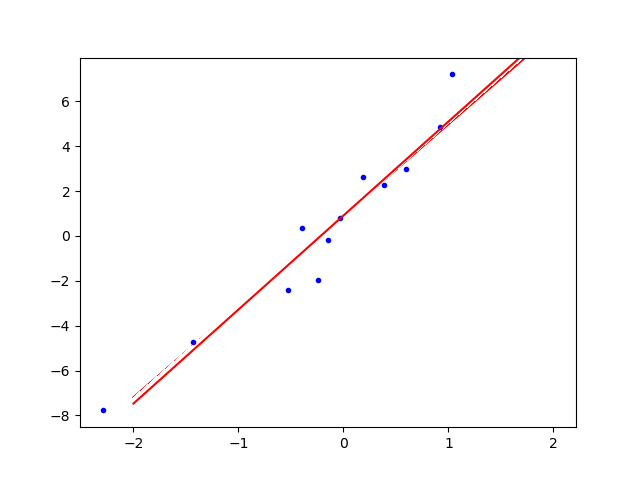

In [7]:
w, b = 1, 0.1
x, y = x_orig, y_orig
plt.figure()
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
l = plt.plot(xlin,w*xlin+b,'r-')[0]
ax = plt.gca()
fig = plt.gcf()

In [8]:
n = 10
alpha = 0.1
w, b = 1, 0.1
hist = []
for i in range(100):    

    ith = [ 3,4  ] ## powinna byc to  lista n liczb (inna za każdym razem)
    x = None
    y = None
### BEGIN SOLUTION
    ith = np.random.choice(m,n,replace=False)
    x = x_orig[ith]
    y = y_orig[ith]
### END SOLUTION
    
    dw = 1/n*(w*x+b-y).dot(x)
    db = 1/n*np.sum(w*x+b-y)

    w = w - alpha*dw
    b = b - alpha*db
    
    if i%10==0:
        print(L(w,b),w,b,end='\r')
        l.set_data(xlin,w*xlin+b)
        fig.canvas.draw()
    hist.append(L(w,b))
    #sleep(0.1)

In [9]:
np.testing.assert_approx_equal(w,4.2, significant=1)
np.testing.assert_approx_equal(b,1.0, significant=1)
assert x.shape[0] == n
assert np.unique(x).shape[0] == n

<IPython.core.display.Javascript object>


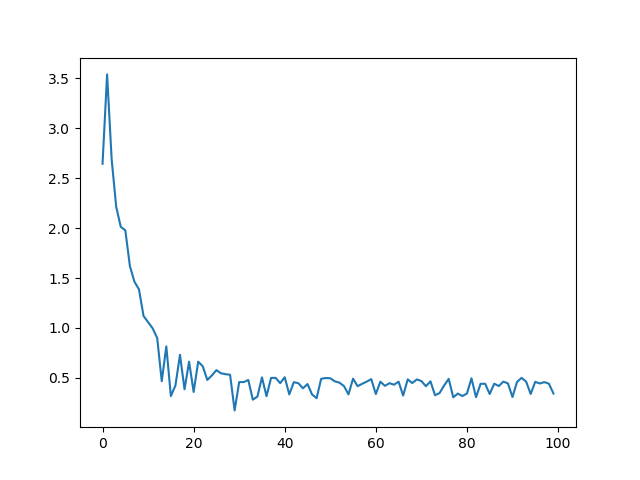

In [10]:
plt.figure()
plt.plot(hist)